In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def lowerSNR(flux, sn):
    orig_mean = np.mean(flux)
    scaled_spec = np.array(flux)*(sn**2)/orig_mean
    return np.array(np.random.poisson(lam=scaled_spec, size=len(flux))*(orig_mean/(sn**2)))

In [2]:
%matplotlib notebook

In [3]:
tempmean = pd.read_csv("hgrv_temp_est_rmsmean.csv")
numspec = tempmean.iloc[:,0]
tempmean = tempmean.iloc[:,1:]
snr = tempmean.columns
tempsd = pd.read_csv("hgrv_temp_est_rmsstd.csv").iloc[:,1:]

<IPython.core.display.Javascript object>


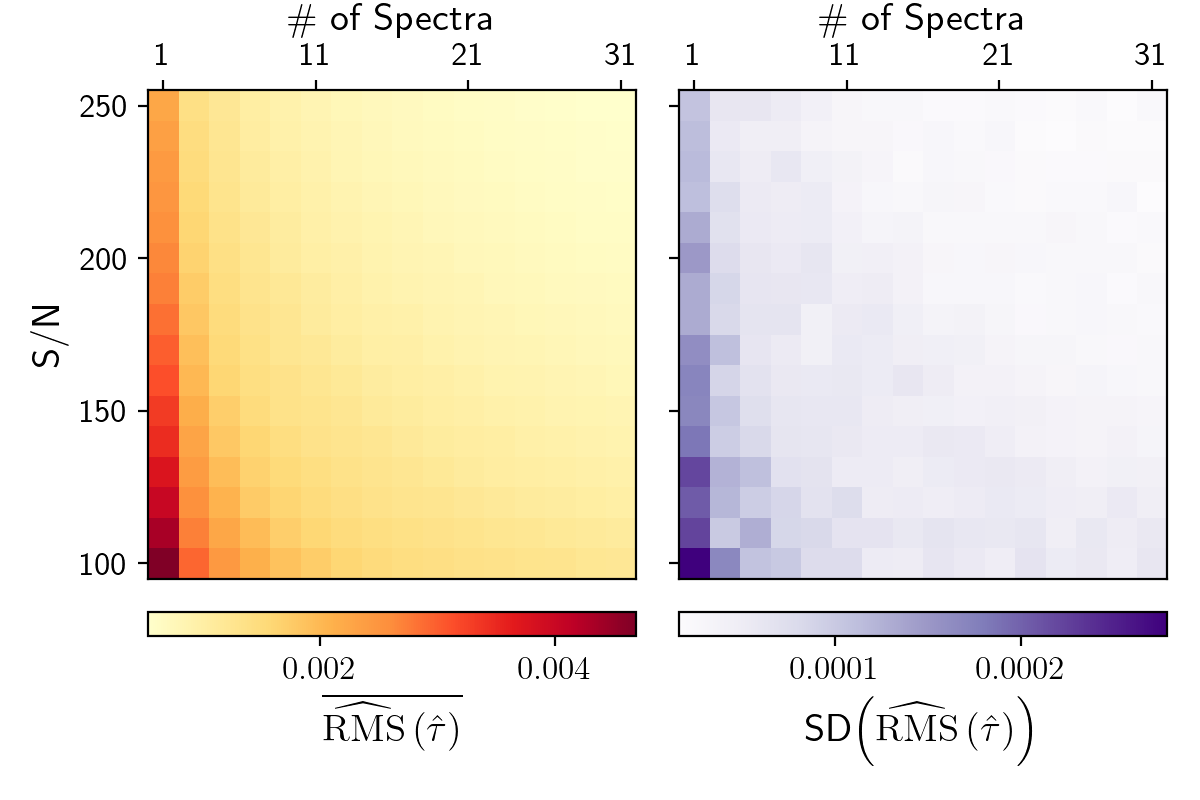

In [5]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(6,4))
plt.rc('text', usetex=True)
im = ax[0].imshow(tempmean.T, cmap = 'YlOrRd', origin='lower')
ytck = np.array([0,5,10,15])
ax[0].xaxis.set_label_position('top') 
ax[0].xaxis.set_ticks_position("top")
ax[0].set_xticks(ytck)
ax[0].set_xticklabels(['%s'%(2*t+1) for t in ytck], fontsize=12)
ax[0].set_yticks(ytck)
ax[0].set_yticklabels(["%s"%(100 + 10*t) for t in ytck], fontsize=12)
ax[0].set_ylabel("S/N", fontsize=14)
ax[0].set_xlabel(r"$\#$ of Spectra", fontsize=14)
cbar = fig.colorbar(im, ax=ax[0], orientation='horizontal', pad=0.05)
cbar.set_label(r"$\overline{\widehat{\mathrm{RMS}}\left( \hat{\tau} \right)} $", fontsize=14)
cbar.ax.tick_params(labelsize=12)

im = ax[1].imshow(tempsd.T, cmap = 'Purples', origin='lower')
ax[1].xaxis.set_label_position('top') 
ax[1].xaxis.set_ticks_position("top")
ax[1].set_xticks(ytck)
ax[1].set_xticklabels(['%s'%(2*t+1) for t in ytck], fontsize=12)
ax[1].set_yticks(ytck)
ax[1].set_yticklabels(['']*4, fontsize=12)
ax[1].set_xlabel(r"$\#$ of Spectra", fontsize=14)
cbar = fig.colorbar(im, ax=ax[1], orientation='horizontal', pad=0.05)
cbar.set_label(r"SD$\left(\widehat{\mathrm{RMS}}\left( \hat{\tau} \right) \right)$ ", fontsize=14)
cbar.ax.tick_params(labelsize=12)


plt.tight_layout()
plt.savefig("template_est.pdf", format='pdf')
plt.show()

In [6]:
#How does the average RMS of the estimated template compare to the effective S/N of the estimated template?
temp = pd.read_csv("smoothednso_expres.csv")
r1 = np.where((temp.Wavelength.values > 5240.8) & (temp.Wavelength.values < 5245.8))[0]

snr = np.linspace(400, 2000, 100)
rms = np.array([np.mean([np.sqrt(np.mean((temp.Flux.values[r1] - 
                                          lowerSNR(temp.Flux.values[r1], s))**2)) for i in range(200)])
               for s in snr])

<IPython.core.display.Javascript object>


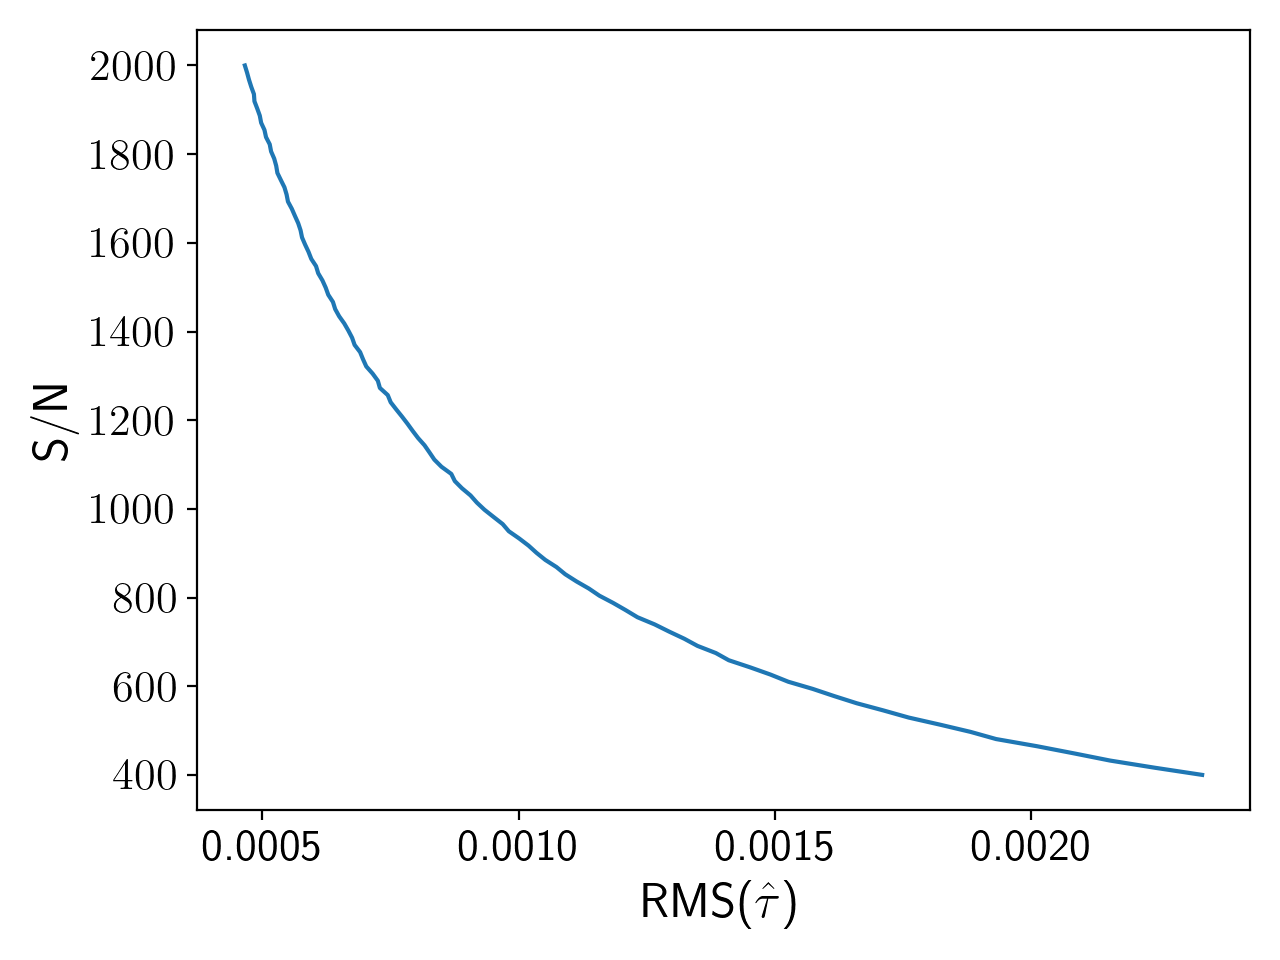

In [8]:
plt.rc('text', usetex=True)
plt.plot(rms, snr)
plt.xlabel(r"RMS($\hat{\tau}$)", fontsize=18)
plt.ylabel("S/N", fontsize=18)
plt.xticks([0.0005, 0.001, 0.0015, 0.002], fontsize=16, labels=["0.0005", "0.0010", "0.0015", "0.0020"])
plt.yticks(fontsize=16)

plt.tight_layout()
plt.savefig("sn_to_rms.pdf", format='pdf')
plt.show()